In [3]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

pybamm.set_logging_level("NOTICE")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.8/157.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 51.9 MB/s eta 0:00:00


In [4]:
experiment = pybamm.Experiment([
    ("Discharge at 1C until 2.5V",
     "Rest for 1 hour",
     "Charge at 1C until 4.2V",
     "Hold at 4.2V until C/50")
    ])

2023-05-18 03:52:42.778 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (2.215 ms elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (2.215 ms elapsed) --------------------
2023-05-18 03:52:42.786 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
NOTICE:pybamm.logger:Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2023-05-18 03:52:42.962 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/4: Rest for 1 hour
NOTICE:pybamm.logger:Cycle 1/1, step 2/4: Rest for 1 hour
2023-05-18 03:52:43.155 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
NOTICE:pybamm.logger:Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2023-05-18 03:52:43.275 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
NOTICE:pybamm.logger:Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2023-05-18 03:52:44.896 - [NOTICE] callbacks.on_experiment_end(220): Finish experiment simulation, took 2.120 s
NOTICE:

interactive(children=(FloatSlider(value=0.0, description='t', max=3.898825172106606, step=0.038988251721066056…

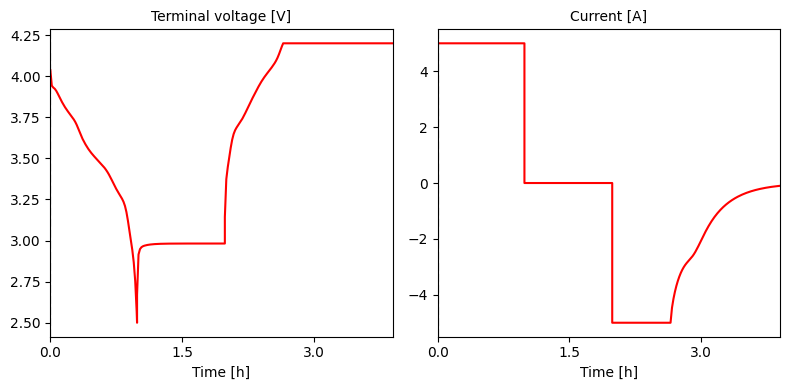

In [5]:
model = pybamm.lithium_ion.SPMe()
parameter_values = pybamm.ParameterValues(values=pybamm.parameter_sets.Chen2020)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2023-05-18 03:52:52.344 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/3 (203.280 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/3 (203.280 us elapsed) --------------------
2023-05-18 03:52:52.349 - [NOTICE] callbacks.on_step_start(180): Cycle 1/3, step 1/4: Discharge at 1C until 2.5V
NOTICE:pybamm.logger:Cycle 1/3, step 1/4: Discharge at 1C until 2.5V
2023-05-18 03:52:52.412 - [NOTICE] callbacks.on_step_start(180): Cycle 1/3, step 2/4: Rest for 1 hour
NOTICE:pybamm.logger:Cycle 1/3, step 2/4: Rest for 1 hour
2023-05-18 03:52:52.459 - [NOTICE] callbacks.on_step_start(180): Cycle 1/3, step 3/4: Charge at 1C until 4.2V
NOTICE:pybamm.logger:Cycle 1/3, step 3/4: Charge at 1C until 4.2V
2023-05-18 03:52:52.533 - [NOTICE] callbacks.on_step_start(180): Cycle 1/3, step 4/4: Hold at 4.2V until C/50
NOTICE:pybamm.logger:Cycle 1/3, step 4/4: Hold at 4.2V until C/50
2023-05-18 03:52:53.361 - [NOTICE] callbacks.on_cycle_start(172): Cycle 2/3 (1.018 s elapsed) --------------------


interactive(children=(FloatSlider(value=0.0, description='t', max=11.70569529961376, step=0.1170569529961376),…

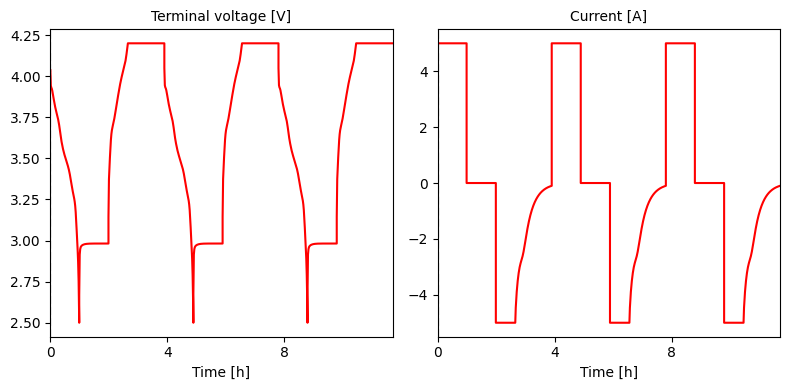

In [6]:
experiment = pybamm.Experiment([
    ("Discharge at 1C until 2.5V",
     "Rest for 1 hour",
     "Charge at 1C until 4.2V",
     "Hold at 4.2V until C/50")
    ] * 3)
model = pybamm.lithium_ion.SPMe()
parameter_values = pybamm.ParameterValues(values=pybamm.parameter_sets.Chen2020)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

In [9]:
sim.solution.cycles

interactive(children=(FloatSlider(value=3.89882517210824, description='t', max=7.802260236790772, min=3.898825…

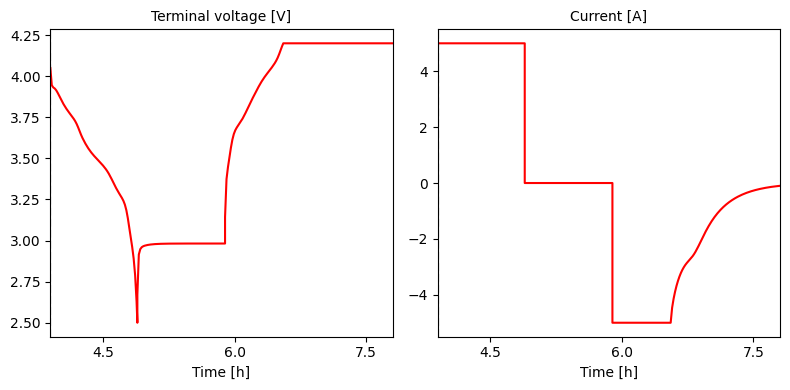

In [10]:
sim.solution.cycles[1].plot(["Terminal voltage [V]", "Current [A]"])

In [11]:
sim.solution.cycles[1].steps

interactive(children=(FloatSlider(value=3.89882517210824, description='t', max=4.891177767251721, min=3.898825…

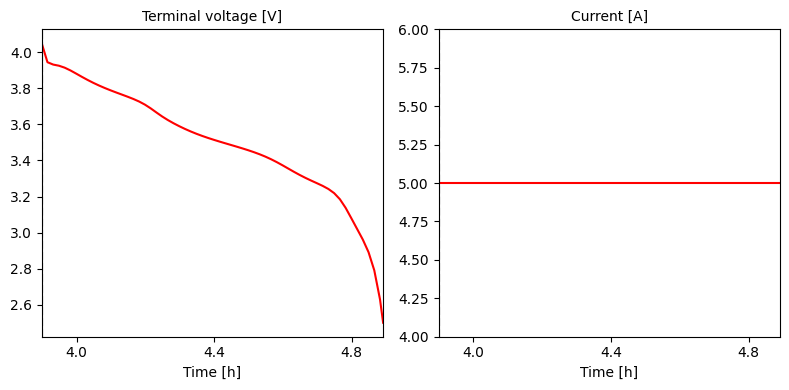

In [12]:
sim.solution.cycles[1].steps[0].plot(["Terminal voltage [V]", "Current [A]"])

In [13]:
parameter_values["Nominal cell capacity [A.h]"]

5.0

2023-05-18 03:53:24.663 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (202.941 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (202.941 us elapsed) --------------------
2023-05-18 03:53:24.671 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/3: Discharge at 5A until 2.5V
NOTICE:pybamm.logger:Cycle 1/1, step 1/3: Discharge at 5A until 2.5V
2023-05-18 03:53:24.759 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/3: Charge at 15W until 4.2V
NOTICE:pybamm.logger:Cycle 1/1, step 2/3: Charge at 15W until 4.2V
2023-05-18 03:53:25.081 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 3/3: Hold at 4.2V until 0.01A
NOTICE:pybamm.logger:Cycle 1/1, step 3/3: Hold at 4.2V until 0.01A
2023-05-18 03:53:26.005 - [NOTICE] callbacks.on_experiment_end(220): Finish experiment simulation, took 1.342 s
NOTICE:pybamm.logger:Finish experiment simulation, took 1.342 s


interactive(children=(FloatSlider(value=0.0, description='t', max=3.791244529553666, step=0.03791244529553666)…

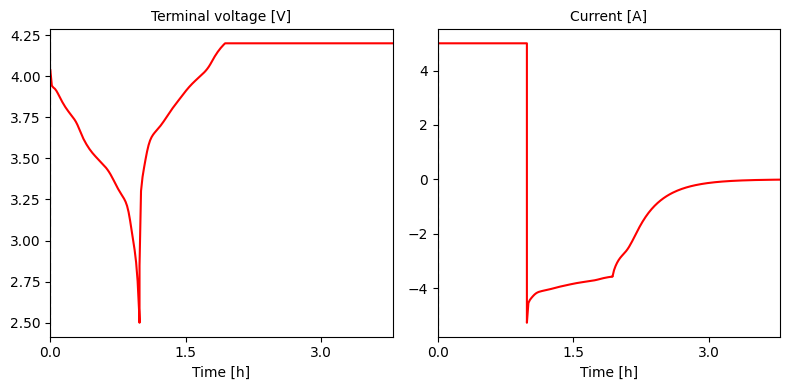

In [14]:
experiment = pybamm.Experiment([
    ("Discharge at 5A until 2.5V",
     "Charge at 15W until 4.2V",
     "Hold at 4.2V until 0.01A")
])
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=3.791244529553666, step=0.03791244529553666)…

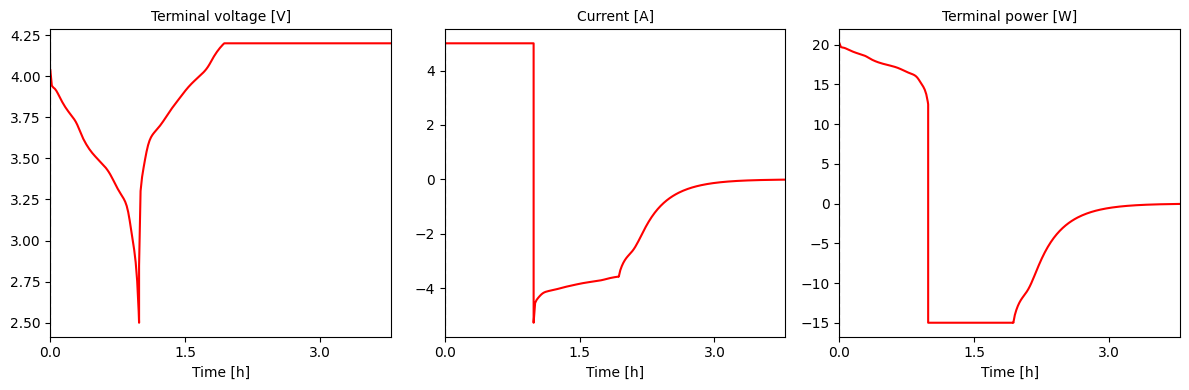

In [15]:
sim.plot(["Terminal voltage [V]", "Current [A]", "Terminal power [W]"])

2023-05-18 03:53:38.197 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (208.830 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (208.830 us elapsed) --------------------
2023-05-18 03:53:38.204 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/11: Discharge at 5A until 2.5V
NOTICE:pybamm.logger:Cycle 1/1, step 1/11: Discharge at 5A until 2.5V
2023-05-18 03:53:38.276 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/11: Charge at 2C for 1 minute
NOTICE:pybamm.logger:Cycle 1/1, step 2/11: Charge at 2C for 1 minute
2023-05-18 03:53:38.324 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 3/11: Rest for 5 minutes
NOTICE:pybamm.logger:Cycle 1/1, step 3/11: Rest for 5 minutes
2023-05-18 03:53:38.363 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 4/11: Charge at 2C for 1 minute
NOTICE:pybamm.logger:Cycle 1/1, step 4/11: Charge at 2C for 1 minute
2023-05-18 03:53:38.377 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 5/11: Rest f

interactive(children=(FloatSlider(value=0.0, description='t', max=4.036048542642362, step=0.04036048542642362)…

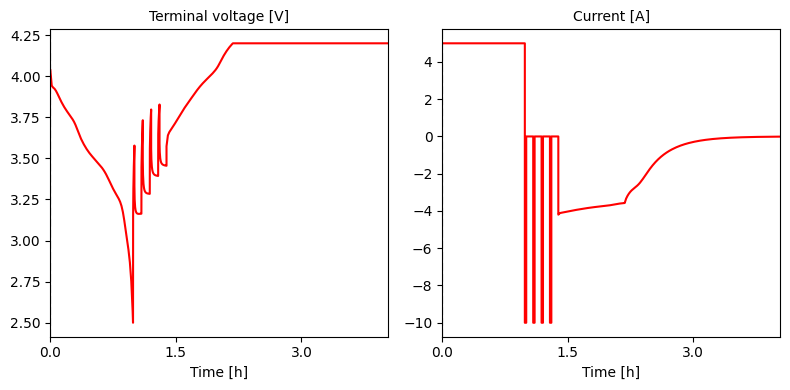

In [16]:
cycle = ["Discharge at 5A until 2.5V"] + [
    "Charge at 2C for 1 minute (1 second period)",
    "Rest for 5 minutes (10 second period)",
    ] * 4 + ["Charge at 15W until 4.2V", "Hold at 4.2V until 0.01A"]
experiment = pybamm.Experiment([tuple(cycle)])
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

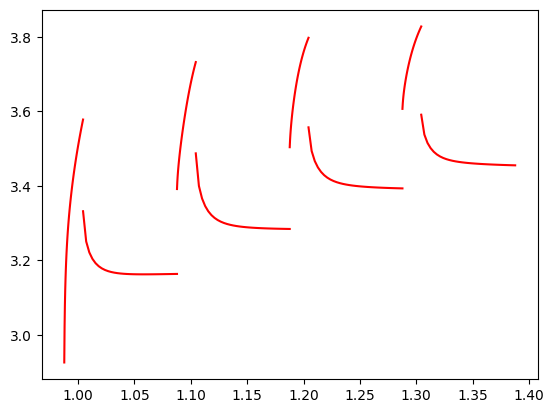

In [17]:
sol = sim.solution
for i in range(1,9):
  step = sol.cycles[0].steps[i]
  plt.plot(step["Time [h]"].data, step["Terminal voltage [V]"].data, "r-")

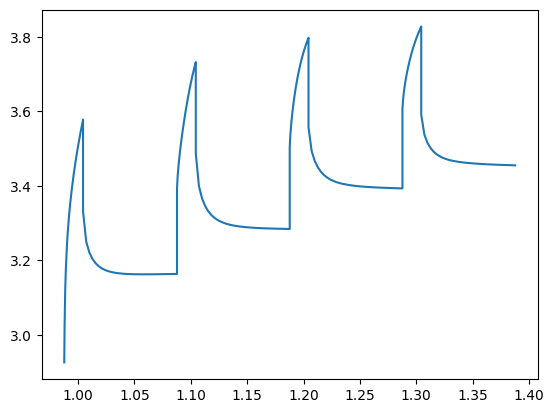

In [18]:
pulses = sol.cycles[0].steps[1]
for i in range(2,9):
  pulses += sol.cycles[0].steps[i]
plt.plot(pulses["Time [h]"].data, pulses["Terminal voltage [V]"].data)

In [19]:
pulses

interactive(children=(FloatSlider(value=0.9877426593767745, description='t', max=1.387742659376497, min=0.9877…

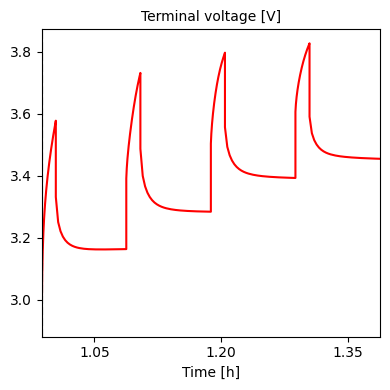

In [20]:
pulses.plot(["Terminal voltage [V]"])

2023-05-18 03:53:58.061 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (187.630 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (187.630 us elapsed) --------------------
2023-05-18 03:53:58.067 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/40: Discharge at C/20 for 1 hour
NOTICE:pybamm.logger:Cycle 1/1, step 1/40: Discharge at C/20 for 1 hour
2023-05-18 03:53:58.120 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/40: Rest for 1 hour
NOTICE:pybamm.logger:Cycle 1/1, step 2/40: Rest for 1 hour
2023-05-18 03:53:58.167 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 3/40: Discharge at C/20 for 1 hour
NOTICE:pybamm.logger:Cycle 1/1, step 3/40: Discharge at C/20 for 1 hour
2023-05-18 03:53:58.188 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 4/40: Rest for 1 hour
NOTICE:pybamm.logger:Cycle 1/1, step 4/40: Rest for 1 hour
2023-05-18 03:53:58.204 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 5/40: Discharge at C/20 for 

interactive(children=(FloatSlider(value=0.0, description='t', max=40.0, step=0.4), Output()), _dom_classes=('w…

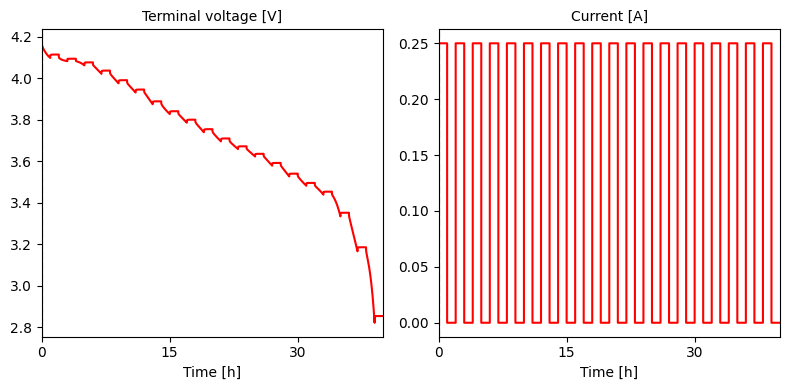

In [21]:
cycle = ["Discharge at C/20 for 1 hour", "Rest for 1 hour"] * 20
experiment = pybamm.Experiment([tuple(cycle)])
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

In [22]:
def extract_resistance(step):
  return step["Local ECM resistance [Ohm]"].data[-1]

Rs = [extract_resistance(step) for i, step in enumerate(sol.cycles[0].steps) if i%2==0]
Rs
# plt.plot(np.arrange(20), Rs)

[0.09639163767789141, 0.0, 0.0, 0.0, 0.0, -0.11131609544437751]

In [23]:
sol = sim.solution
def extract_resistance(step):
  return step["Local ECM resistance [Ohm]"].data[-1]

Rs = [extract_resistance(step) for i, step in enumerate(sol.cycles[0].steps) if i%2==0]
Rs
# plt.plot(np.arrange(20), Rs)

[0.06480803910348243,
 0.048108828224741274,
 0.05662391457515881,
 0.06266220918814014,
 0.06040879658536724,
 0.05713809883637744,
 0.05602215514893061,
 0.055300577316218735,
 0.05842446258451872,
 0.06005062694605279,
 0.05686854743364478,
 0.05318449876662612,
 0.05202445076515261,
 0.0529347781556222,
 0.05390141615045607,
 0.05469239100709089,
 0.05835560753626012,
 0.07016568072961249,
 0.07821910209280425,
 0.12910147879493827]

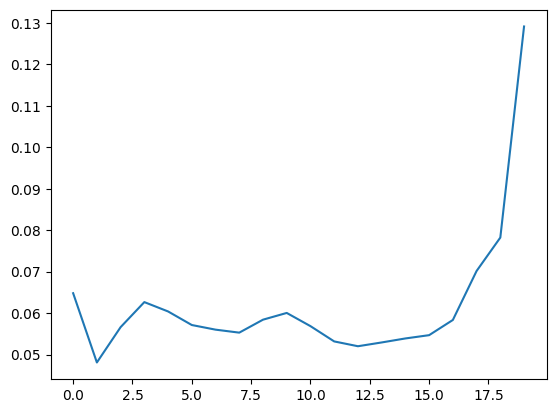

In [24]:
sol = sim.solution
def extract_resistance(step):
  return step["Local ECM resistance [Ohm]"].data[-1]

Rs = [extract_resistance(step) for i, step in enumerate(sol.cycles[0].steps) if i%2==0]
plt.plot(np.arange(20), Rs)

In [25]:
experiment = pybamm.Experiment([("Charge at 1C until 4.2V", "Hold at 4.2V until C/50")])
sols = []
init_socs = [0,0.2,0.4,0.6,0.8]
for initial_soc in init_socs:
  sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
  sol = sim.solve(initial_soc=initial_soc)
  sols.append(sol)

2023-05-18 03:59:59.507 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (203.190 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (203.190 us elapsed) --------------------
2023-05-18 03:59:59.513 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/2: Charge at 1C until 4.2V
NOTICE:pybamm.logger:Cycle 1/1, step 1/2: Charge at 1C until 4.2V
2023-05-18 03:59:59.581 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
NOTICE:pybamm.logger:Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2023-05-18 04:00:00.432 - [NOTICE] callbacks.on_experiment_end(220): Finish experiment simulation, took 924.187 ms
NOTICE:pybamm.logger:Finish experiment simulation, took 924.187 ms
2023-05-18 04:00:02.045 - [NOTICE] callbacks.on_cycle_start(172): Cycle 1/1 (217.650 us elapsed) --------------------
NOTICE:pybamm.logger:Cycle 1/1 (217.650 us elapsed) --------------------
2023-05-18 04:00:02.052 - [NOTICE] callbacks.on_step_start(180): Cycle 1/1, step 1/2

interactive(children=(FloatSlider(value=0.0, description='t', max=1.9432363680045437, step=0.01943236368004543…

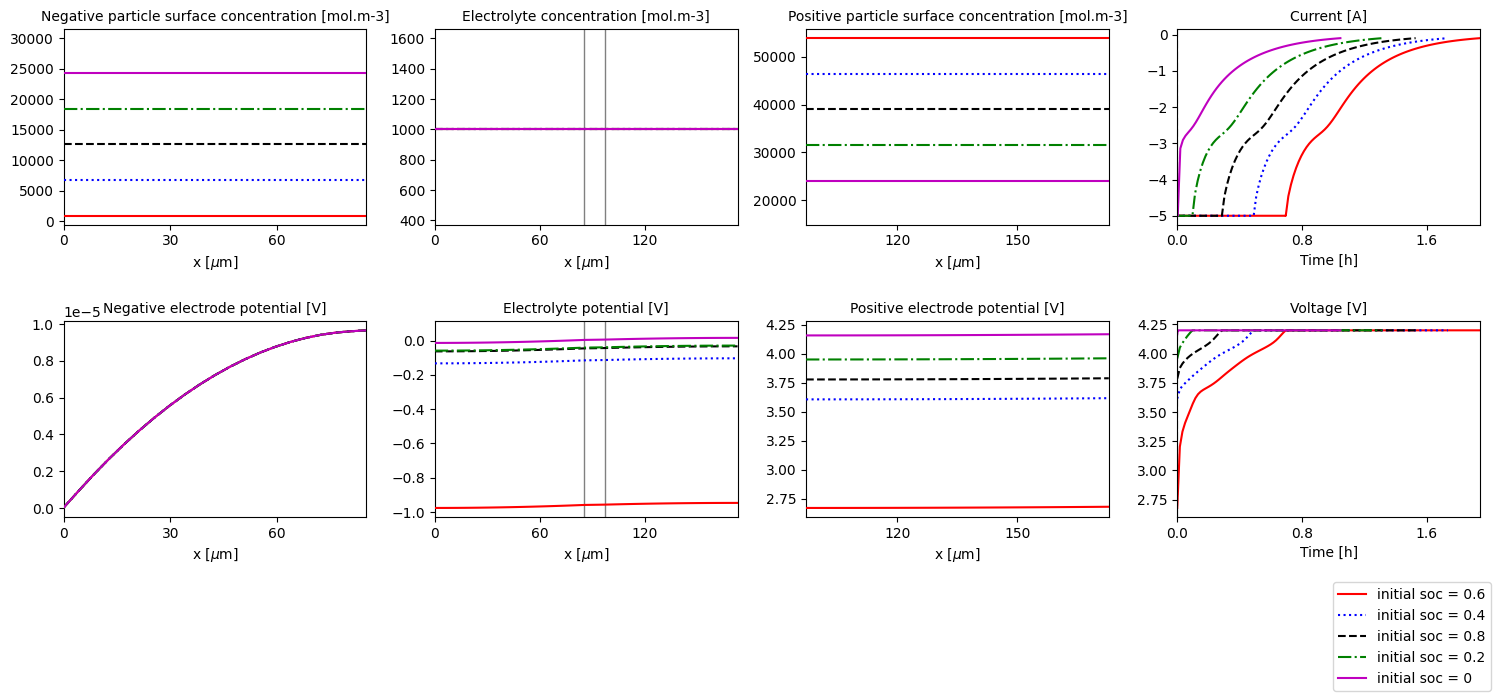

In [27]:
pybamm.dynamic_plot(sols,labels={f"initial soc = {x}" for x in init_socs})

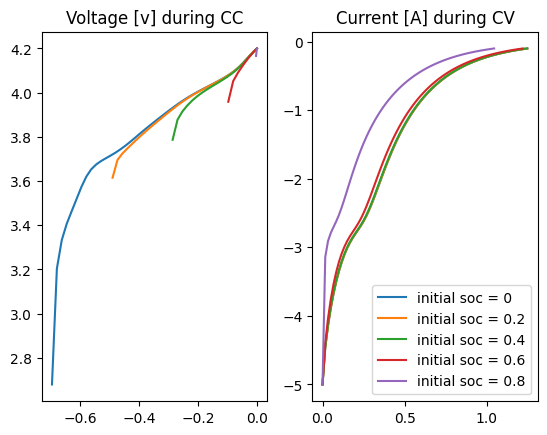

In [32]:
fig, ax = plt.subplots(1,2)

for sol in sols:
  cc = sol.cycles[0].steps[0]
  cv = sol.cycles[0].steps[1]
  t_cc = cc["Time [h]"].data
  t_cv = cv["Time [h]"].data
  ax[0].plot(t_cc-t_cv[0], cc["Terminal voltage [V]"].data)
  ax[0].set_title("Voltage [v] during CC")
  ax[1].plot(t_cv-t_cv[0], cv["Current [A]"].data)
  ax[1].set_title("Current [A] during CV")
  ax[1].legend([f"initial soc = {x}" for x in init_socs])